# Project Title: Laptop Price Prediction for SmartTech Co. 
## Project Overview:
##### SmartTech Co. has partnered with our data science team to develop a robust machine learning model that predicts laptop prices accurately. As the market for laptops continues to expand with a myriad of brands and specifications, having a precise pricing model becomes crucial for both consumers and manufacturers.

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df= pd.read_csv('laptop.csv')
df

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [3]:
#  we will drop our unnecessary column
df.drop(columns=['Unnamed: 0.1','Unnamed: 0'], inplace= True) 

In [4]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [5]:
df.duplicated().sum()

58

In [6]:
df.drop_duplicates(inplace = True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(1245, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1245 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1244 non-null   object 
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram               1244 non-null   object 
 6   Memory            1244 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight            1244 non-null   object 
 10  Price             1244 non-null   float64
dtypes: float64(1), object(10)
memory usage: 116.7+ KB


In [10]:
df.isnull().sum()

Company             1
TypeName            1
Inches              1
ScreenResolution    1
Cpu                 1
Ram                 1
Memory              1
Gpu                 1
OpSys               1
Weight              1
Price               1
dtype: int64

In [11]:
df.dropna(inplace = True)

In [12]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [13]:
df.shape

(1244, 11)

In [14]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496
1270,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1272,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200


In [15]:
df['Ram'] = df['Ram'].str.replace('GB','')

In [16]:
df['Weight'] = df['Weight'].str.replace('kg','')

In [17]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2,38378.6496
1270,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,33992.6400
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,79866.7200
1272,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,12201.1200


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1244 non-null   object 
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram               1244 non-null   object 
 6   Memory            1244 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight            1244 non-null   object 
 10  Price             1244 non-null   float64
dtypes: float64(1), object(10)
memory usage: 116.6+ KB


In [19]:
df['Ram'].unique() # no garbage values are present 

array(['8', '16', '4', '2', '12', '64', '6', '32', '24', '1'],
      dtype=object)

In [20]:
df['Ram'] = df['Ram'].astype('int32')
df['Ram'].dtype 

dtype('int32')

In [21]:
df['Inches'].unique() 

array(['13.3', '15.6', '15.4', '14', '12', '17.3', '13.5', '12.5', '13',
       '18.4', '13.9', '11.6', '25.6', '35.6', '12.3', '27.3', '24',
       '33.5', '?', '31.6', '17', '15', '14.1', '11.3', '10.1'],
      dtype=object)

In [22]:
# Calculate the mode
mode_value = df['Inches'].mode()[0]

# Replace garbage value in a particular column with mode value
garbage_value = '?'
df['Inches'] = df['Inches'].replace(garbage_value, mode_value)

In [23]:
df['Inches'] = df['Inches'].astype('float32')
df['Inches'].dtype

dtype('float32')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1244 non-null   float32
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram               1244 non-null   int32  
 6   Memory            1244 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight            1244 non-null   object 
 10  Price             1244 non-null   float64
dtypes: float32(1), float64(1), int32(1), object(8)
memory usage: 106.9+ KB


In [25]:
df['Weight'].unique()

array(['1.37', '1.34', '1.86', '1.83', '2.1', '2.04', '1.3', '1.6', '2.2',
       '0.92', '1.22', '2.5', '1.62', '1.91', '2.3', '1.35', '1.88',
       '1.89', '1.65', '2.71', '1.2', '1.44', '2.8', '2', '2.65', '2.77',
       '3.2', '1.49', '2.4', '2.13', '2.43', '1.7', '1.4', '1.8', '1.9',
       '3', '1.252', '2.7', '2.02', '1.63', '1.96', '1.21', '2.45',
       '1.25', '1.5', '2.62', '1.38', '1.58', '1.85', '1.23', '2.16',
       '2.36', '7.2', '2.05', '1.32', '1.75', '0.97', '2.56', '1.48',
       '1.74', '1.1', '1.56', '2.03', '1.05', '5.4', '4.4', '1.90',
       '1.29', '2.0', '1.95', '2.06', '1.12', '3.49', '3.35', '2.23', '?',
       '2.9', '4.42', '2.69', '2.37', '4.7', '3.6', '2.08', '4.3', '1.68',
       '1.41', '4.14', '2.18', '2.24', '2.67', '4.1', '2.14', '1.36',
       '2.25', '2.15', '2.19', '2.54', '3.42', '5.8', '1.28', '2.33',
       '1.45', '2.79', '8.23', '1.26', '1.84', '0.0002', '2.6', '2.26',
       '3.25', '1.59', '1.13', '1.42', '1.78', '1.10', '1.15', '1.27',


In [26]:
# Calculate the mode
mode_ = df['Weight'].mode()[0]

# Replace garbage value in a particular column with mode value
garbage_value = '?'
df['Weight'] = df['Weight'].replace(garbage_value, mode_)

In [27]:
df['Weight'] = df['Weight'].astype('float32')
df['Weight'].dtype 

dtype('float32')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1244 non-null   float32
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram               1244 non-null   int32  
 6   Memory            1244 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight            1244 non-null   float32
 10  Price             1244 non-null   float64
dtypes: float32(2), float64(1), int32(1), object(7)
memory usage: 102.0+ KB


In [29]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200


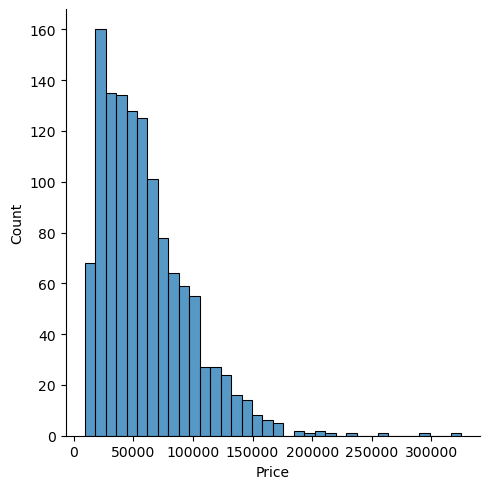

In [30]:
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
sns.displot(df['Price']) 

<Axes: xlabel='Company'>

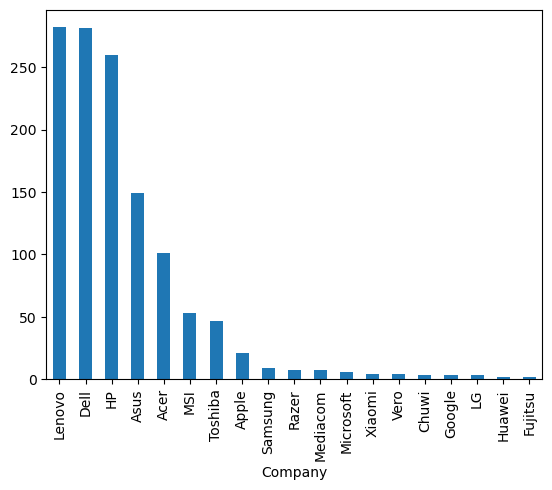

In [31]:
df['Company'].value_counts().plot(kind = 'bar') 

# Checking outliers

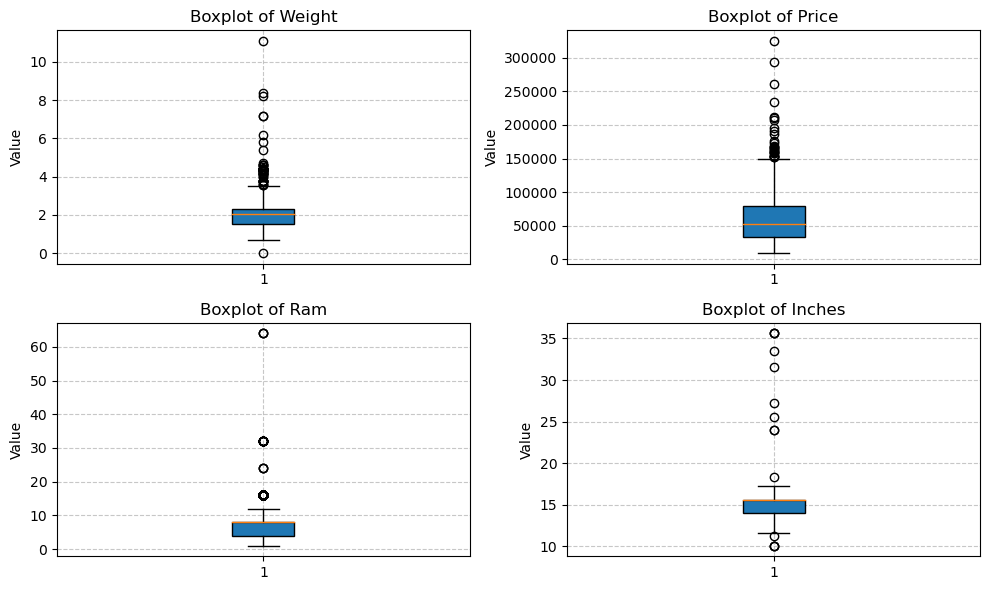

In [32]:
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 

# Select the columns to include in the boxplot
columns_to_plot = ['Weight', 'Price', 'Ram', 'Inches']

# Create boxplots for each column using Matplotlib
plt.figure(figsize=(10, 6))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(df[column], patch_artist=True)
    plt.title(f'Boxplot of {column}')
    plt.ylabel('Value')
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show() 

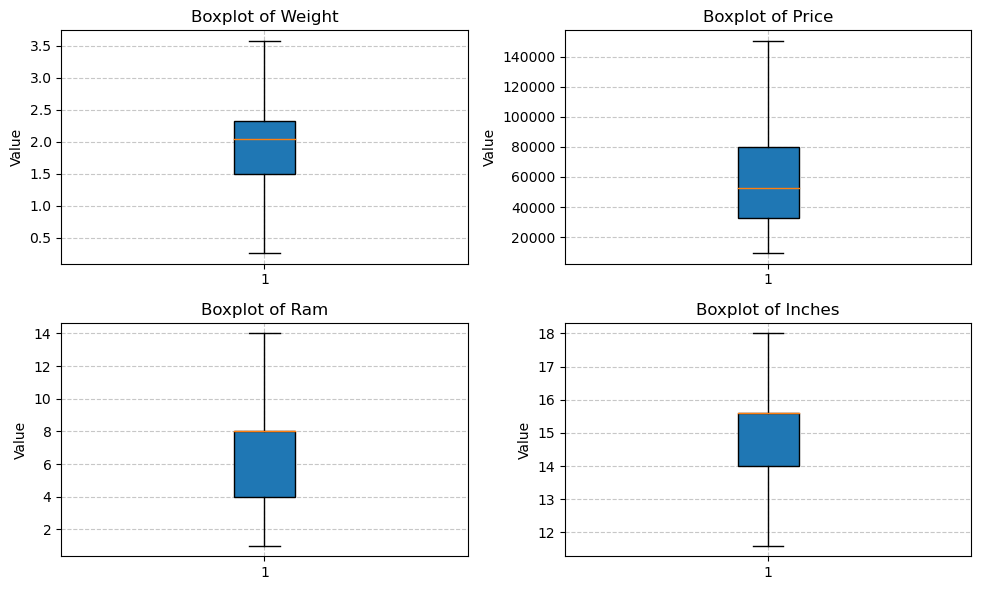

In [33]:
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 

# Select the columns to include in the boxplot
columns_to_plot = ['Weight', 'Price', 'Ram', 'Inches']

# Clip outliers with IQR method
for column in columns_to_plot:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Create boxplots for each column using Matplotlib
plt.figure(figsize=(10, 6))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(df[column], patch_artist=True)
    plt.title(f'Boxplot of {column}')
    plt.ylabel('Value')
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [34]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,14,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,14,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200


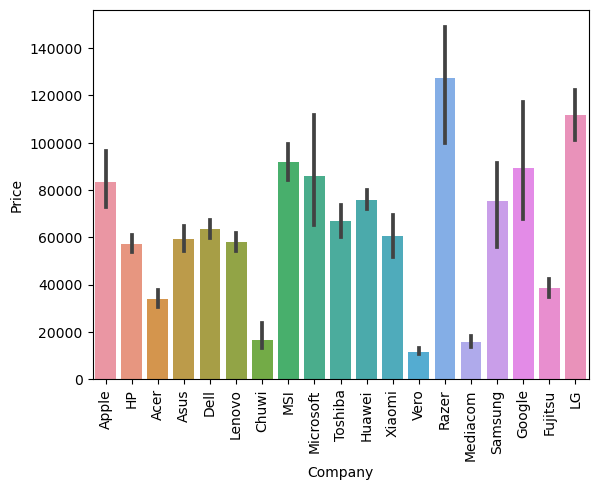

In [35]:
sns.barplot(x=df['Company'], y=df['Price'])
plt.xticks(rotation= 'vertical')
plt.show()

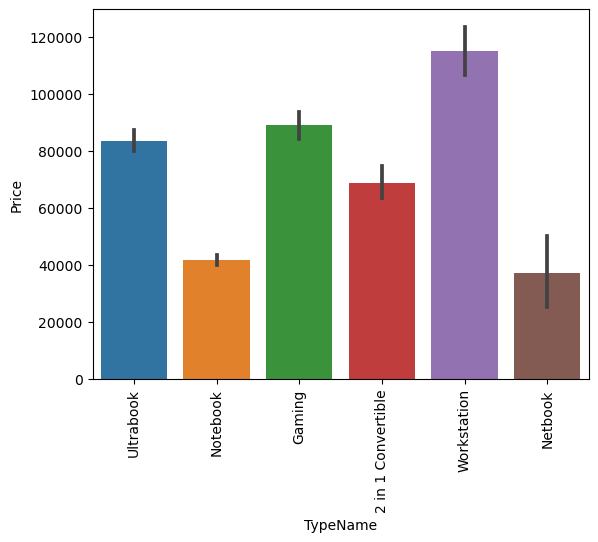

In [36]:
sns.barplot(x=df['TypeName'], y=df['Price'])
plt.xticks(rotation= 'vertical')
plt.show()

<Axes: xlabel='Inches', ylabel='Price'>

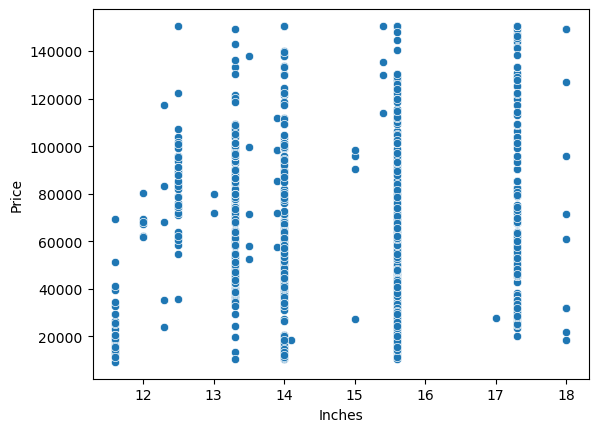

In [37]:
sns.scatterplot(x=df['Inches'], y = df['Price'])

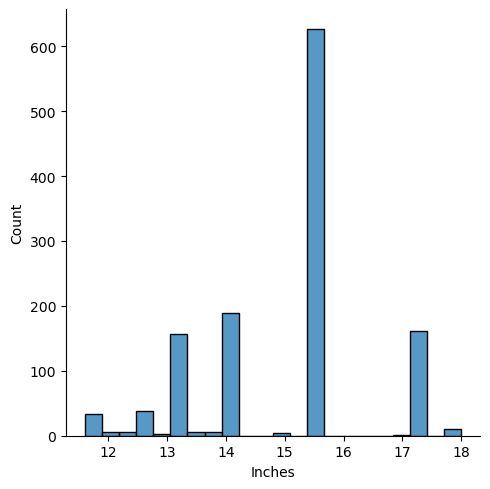

In [38]:
sns.displot(df['Inches'])

In [39]:
df['ScreenResolution'].value_counts() 

ScreenResolution
Full HD 1920x1080                                493
1366x768                                         255
IPS Panel Full HD 1920x1080                      222
IPS Panel Full HD / Touchscreen 1920x1080         50
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Retina Display 2880

In [40]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)    
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
1069,Apple,Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M 1.1GHz,8,256GB Flash Storage,Intel HD Graphics 515,Mac OS X,0.920,69264.000,0
1185,Asus,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.591,48431.520,0
514,Xiaomi,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,14,256GB SSD,Nvidia GeForce MX150,No OS,1.950,74589.336,0
82,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.630,45820.800,0
27,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,AMD Radeon 530,Windows 10,2.200,42624.000,0
133,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i3 7130U 2.7GHz,4,256GB SSD,Nvidia GeForce MX130,Windows 10,3.575,30476.160,0
803,Dell,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.060,93186.720,1
888,Acer,Netbook,11.6,IPS Panel 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.250,15824.160,0
236,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 520,Linux,2.100,20779.200,0
406,Toshiba,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,14,512GB SSD,Intel HD Graphics 520,Windows 10,1.200,93080.160,0


<Axes: xlabel='Touchscreen'>

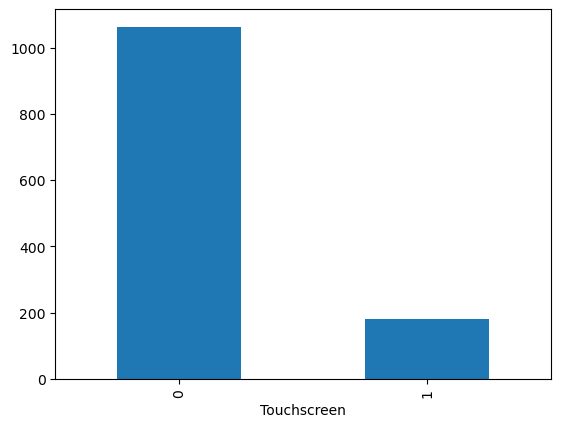

In [41]:
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

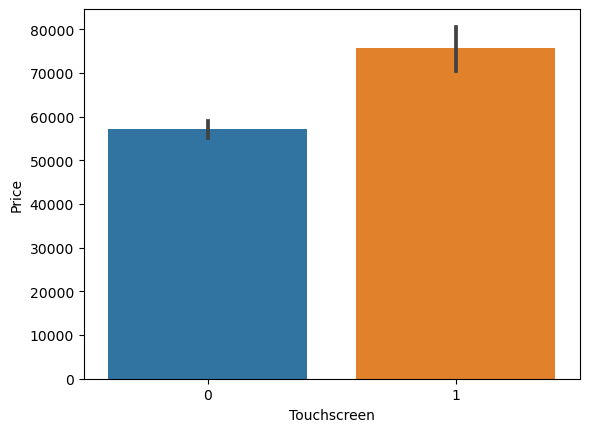

In [42]:
sns.barplot(x=df['Touchscreen'], y=df['Price'])

In [43]:
df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

<Axes: xlabel='IPS'>

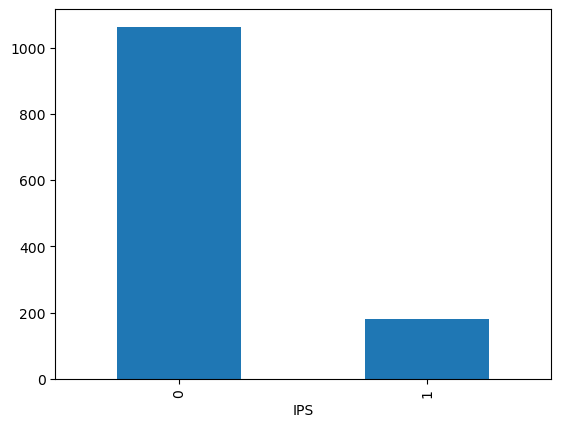

In [44]:
df['IPS'].value_counts().plot(kind='bar')

<Axes: xlabel='IPS', ylabel='Price'>

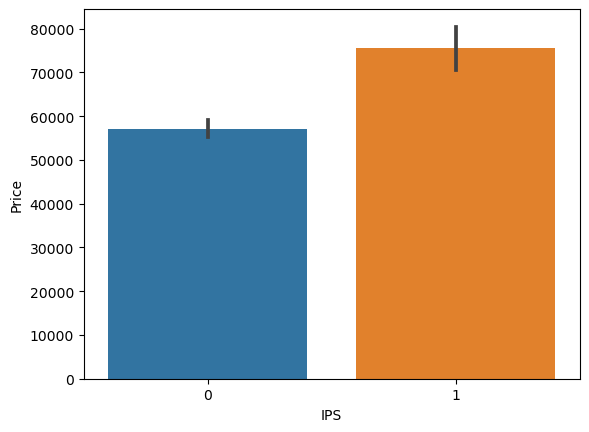

In [45]:
sns.barplot(x=df['IPS'], y=df['Price']) 

In [46]:
new_df = df['ScreenResolution'].str.split('x', n=1,expand=True)
new_df

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1269,1366,768
1270,IPS Panel Full HD / Touchscreen 1920,1080
1271,IPS Panel Quad HD+ / Touchscreen 3200,1800
1272,1366,768


In [47]:
df['x_res'] = new_df[0]
df['y_res'] = new_df[1]  

In [48]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,14,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,IPS Panel Retina Display 2560,1600


In [49]:
df['x_res'] = df['x_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,14,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,0,0,1366,768
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,1920,1080
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,14,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,3200,1800
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,1366,768


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1244 non-null   float64
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram               1244 non-null   int32  
 6   Memory            1244 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight            1244 non-null   float32
 10  Price             1244 non-null   float64
 11  Touchscreen       1244 non-null   int64  
 12  IPS               1244 non-null   int64  
 13  x_res             1244 non-null   object 
 14  y_res             1244 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 145.8+ KB


In [51]:
df['x_res'] = df['x_res'].astype('int32')
df['y_res'] = df['y_res'].astype('int32') 

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1244 non-null   float64
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram               1244 non-null   int32  
 6   Memory            1244 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight            1244 non-null   float32
 10  Price             1244 non-null   float64
 11  Touchscreen       1244 non-null   int64  
 12  IPS               1244 non-null   int64  
 13  x_res             1244 non-null   int32  
 14  y_res             1244 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 136.1+ KB


In [53]:
corr_df = df[['Inches','Ram','Weight','Price','Touchscreen','IPS','x_res','y_res']]
corr_df 

,Inches,Ram,Weight,Price,Touchscreen,IPS,x_res,y_res
0,13.3,8,1.37,71378.6832,0,0,2560,1600
1,13.3,8,1.34,47895.5232,0,0,1440,900
2,15.6,8,1.86,30636.0000,0,0,1920,1080
3,15.4,14,1.83,135195.3360,0,0,2880,1800
4,13.3,8,1.37,96095.8080,0,0,2560,1600
...,...,...,...,...,...,...,...,...
1269,15.6,4,2.20,38378.6496,0,0,1366,768
1270,14.0,4,1.80,33992.6400,1,1,1920,1080
1271,13.3,14,1.30,79866.7200,1,1,3200,1800
1272,14.0,2,1.50,12201.1200,0,0,1366,768


In [54]:
corr_df.corr()['Price']

Inches         0.039728
Ram            0.735598
Weight         0.123773
Price          1.000000
Touchscreen    0.190539
IPS            0.190539
x_res          0.548901
y_res          0.546457
Name: Price, dtype: float64

In [55]:
df['ppi'] = (((df['x_res']**2 + df['y_res']**2)**0.5)/ df['Inches']).astype('float64')
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,2560,1600,226.983001
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677938
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211995
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,14,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,2880,1800,220.534629
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,2560,1600,226.983001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,0,0,1366,768,100.454667
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,1920,1080,157.350512
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,14,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,3200,1800,276.053526
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,1366,768,111.935204


In [56]:
df['ppi'].corr(df['Price']) 

0.4817165173209883

In [57]:
df.drop(columns=['ScreenResolution'], inplace=True)

In [58]:
df.drop(columns=['Inches','x_res','y_res'], inplace=True)

In [59]:
df

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,226.983001
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995
3,Apple,Ultrabook,Intel Core i7 2.7GHz,14,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,220.534629
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,226.983001
...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,0,0,100.454667
1270,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512
1271,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,14,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053526
1272,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204


In [60]:
df['Cpu'].unique() 

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Core i5 7300HQ 2.5GHz',
       'AMD E-Series E2-9000e 1.5GHz', 'Intel Core i5 1.6GHz',
       'Intel Core i7 8650U 1.9GHz', 'Intel Atom x5-Z8300 1.44GHz',
       'AMD E-Series E2-6110 1.5GHz', 'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Celeron Dual Core N3060 1.6GHz', 'Intel Core i5 1.3GHz',
       'AMD FX 9830P 3GHz', '

In [61]:
df['Cpu Name'] = df['Cpu'].apply(lambda x: x.split()[0:3])
df

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,226.983001,"[Intel, Core, i5]"
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,"[Intel, Core, i5]"
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,"[Intel, Core, i5]"
3,Apple,Ultrabook,Intel Core i7 2.7GHz,14,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,220.534629,"[Intel, Core, i7]"
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,226.983001,"[Intel, Core, i5]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,0,0,100.454667,"[Intel, Core, i7]"
1270,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,"[Intel, Core, i7]"
1271,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,14,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053526,"[Intel, Core, i7]"
1272,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,"[Intel, Celeron, Dual]"


In [62]:
def fetch_processor(text):
    if isinstance(text, list):
        text = ' '.join(text)
    
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    elif text.startswith('Intel'):
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'

In [63]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)
df

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,226.983001,"[Intel, Core, i5]",Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,"[Intel, Core, i5]",Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,"[Intel, Core, i5]",Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,14,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,220.534629,"[Intel, Core, i7]",Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,226.983001,"[Intel, Core, i5]",Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,0,0,100.454667,"[Intel, Core, i7]",Intel Core i7
1270,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,"[Intel, Core, i7]",Intel Core i7
1271,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,14,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053526,"[Intel, Core, i7]",Intel Core i7
1272,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,"[Intel, Celeron, Dual]",Other Intel Processor


<Axes: xlabel='Cpu brand'>

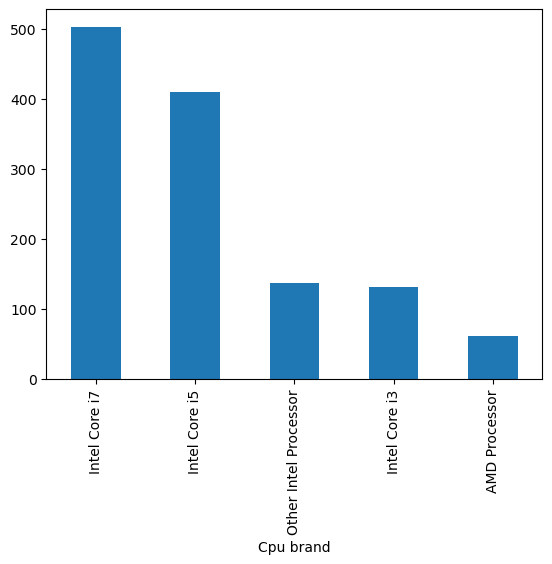

In [64]:
df['Cpu brand'].value_counts().plot(kind='bar') 

In [65]:
df.drop(columns=['Cpu','Cpu Name'], inplace= True) 

In [66]:
df.head() 

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,226.983001,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5
3,Apple,Ultrabook,14,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,220.534629,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,226.983001,Intel Core i5


<Axes: xlabel='Ram'>

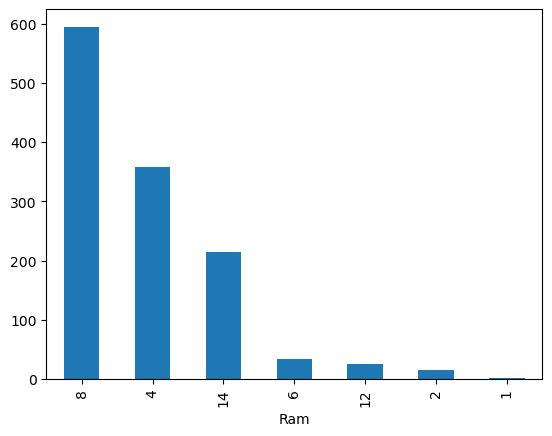

In [67]:
df['Ram'].value_counts().plot(kind='bar') 

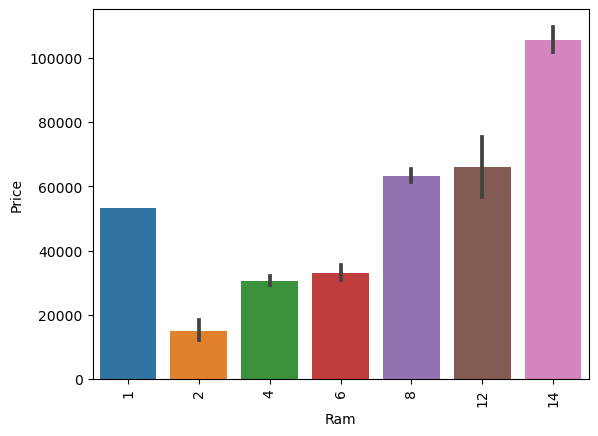

In [68]:
sns.barplot(x=df['Ram'], y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show() 

In [69]:
df['Memory'].value_counts() 

Memory
256GB SSD                        401
1TB HDD                          209
500GB HDD                        121
512GB SSD                        112
128GB SSD +  1TB HDD              92
128GB SSD                         72
256GB SSD +  1TB HDD              71
32GB Flash Storage                35
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           13
64GB Flash Storage                12
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          4
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [70]:
# Calculate the mode
mode_value = df['Memory'].mode()[0]

# Replace garbage value in a particular column with mode value
garbage_value = '?'
df['Memory'] = df['Memory'].replace(garbage_value, mode_value) 

In [71]:
df['Memory Amount'] = df.Memory.str.split(' ').apply(lambda x: x[0])
df["Memory Type"] = df.Memory.str.split(" ").apply(lambda x: x[1]) 

In [72]:
df['Memory Type'].value_counts() 

Memory Type
SSD       817
HDD       350
Flash      69
Hybrid      8
Name: count, dtype: int64

In [73]:
df['Memory Amount'].value_counts()   

Memory Amount
256GB    496
1TB      225
128GB    171
512GB    134
500GB    121
32GB      42
2TB       16
64GB      14
16GB      10
1.0TB      8
180GB      4
240GB      1
8GB        1
508GB      1
Name: count, dtype: int64

In [74]:
df

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,Memory Amount,Memory Type
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,226.983001,Intel Core i5,128GB,SSD
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,128GB,Flash
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,256GB,SSD
3,Apple,Ultrabook,14,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,220.534629,Intel Core i7,512GB,SSD
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,226.983001,Intel Core i5,256GB,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,0,0,100.454667,Intel Core i7,500GB,HDD
1270,Lenovo,2 in 1 Convertible,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,128GB,SSD
1271,Lenovo,2 in 1 Convertible,14,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053526,Intel Core i7,512GB,SSD
1272,Lenovo,Notebook,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,64GB,Flash


In [75]:
def turn_memory_into_GB(value):
    if "GB" in value:
        return float(value[:value.find("GB")])
    elif "TB" in value: 
        return float(value[:value.find("TB")]) * 1000

df['Memory Amount'] = df['Memory Amount'].apply(turn_memory_into_GB)      

In [76]:
df

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,Memory Amount,Memory Type
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,226.983001,Intel Core i5,128.0,SSD
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,128.0,Flash
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,256.0,SSD
3,Apple,Ultrabook,14,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,220.534629,Intel Core i7,512.0,SSD
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,226.983001,Intel Core i5,256.0,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,0,0,100.454667,Intel Core i7,500.0,HDD
1270,Lenovo,2 in 1 Convertible,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,128.0,SSD
1271,Lenovo,2 in 1 Convertible,14,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053526,Intel Core i7,512.0,SSD
1272,Lenovo,Notebook,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,64.0,Flash


In [77]:
df['SSD'] = 0
df['HDD'] = 0
df['Flash_Storage'] = 0
df['Hybrid'] = 0

# Populate the new columns based on Memory Type
df.loc[df['Memory Type'] == 'SSD', 'SSD'] = df['Memory Amount']
df.loc[df['Memory Type'] == 'HDD', 'HDD'] = df['Memory Amount']
df.loc[df['Memory Type'] == 'Flash', 'Flash_Storage'] = df['Memory Amount']
df.loc[df['Memory Type'].str.contains('Hybrid'), 'Hybrid'] = df['Memory Amount'] 


In [78]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 0 to 1273
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1244 non-null   object 
 1   TypeName       1244 non-null   object 
 2   Ram            1244 non-null   int32  
 3   Memory         1244 non-null   object 
 4   Gpu            1244 non-null   object 
 5   OpSys          1244 non-null   object 
 6   Weight         1244 non-null   float32
 7   Price          1244 non-null   float64
 8   Touchscreen    1244 non-null   int64  
 9   IPS            1244 non-null   int64  
 10  ppi            1244 non-null   float64
 11  Cpu brand      1244 non-null   object 
 12  Memory Amount  1244 non-null   float64
 13  Memory Type    1244 non-null   object 
 14  SSD            1244 non-null   int64  
 15  HDD            1244 non-null   int64  
 16  Flash_Storage  1244 non-null   int64  
 17  Hybrid         1244 non-null   int64  
dtypes: float32(1)

In [79]:
df.sample(5) 

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,Memory Amount,Memory Type,SSD,HDD,Flash_Storage,Hybrid
1271,Lenovo,2 in 1 Convertible,14,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053526,Intel Core i7,512.0,SSD,512,0,0,0
934,Toshiba,Notebook,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.47,58874.4000,0,0,157.350512,Intel Core i5,128.0,SSD,128,0,0,0
29,HP,Notebook,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.50,47738.8800,0,0,127.335680,Intel Core i5,1000.0,HDD,0,1000,0,0
80,Dell,Ultrabook,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.88,58403.4048,0,0,141.211995,Intel Core i5,256.0,SSD,256,0,0,0
601,HP,Notebook,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.10,35616.6144,0,0,100.454667,Intel Core i3,500.0,HDD,0,500,0,0


In [80]:
corr_column = df[['Ram','Weight','Price','Touchscreen','IPS','ppi','HDD','SSD','Hybrid','Flash_Storage']] 

In [81]:
corr_column 

,Ram,Weight,Price,Touchscreen,IPS,ppi,HDD,SSD,Hybrid,Flash_Storage
0,8,1.37,71378.6832,0,0,226.983001,0,128,0,0
1,8,1.34,47895.5232,0,0,127.677938,0,0,0,128
2,8,1.86,30636.0000,0,0,141.211995,0,256,0,0
3,14,1.83,135195.3360,0,0,220.534629,0,512,0,0
4,8,1.37,96095.8080,0,0,226.983001,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...
1269,4,2.20,38378.6496,0,0,100.454667,500,0,0,0
1270,4,1.80,33992.6400,1,1,157.350512,0,128,0,0
1271,14,1.30,79866.7200,1,1,276.053526,0,512,0,0
1272,2,1.50,12201.1200,0,0,111.935204,0,0,0,64


In [82]:
corr_column.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 0 to 1273
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ram            1244 non-null   int32  
 1   Weight         1244 non-null   float32
 2   Price          1244 non-null   float64
 3   Touchscreen    1244 non-null   int64  
 4   IPS            1244 non-null   int64  
 5   ppi            1244 non-null   float64
 6   HDD            1244 non-null   int64  
 7   SSD            1244 non-null   int64  
 8   Hybrid         1244 non-null   int64  
 9   Flash_Storage  1244 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(6)
memory usage: 129.5 KB


In [83]:
corr_column.shape

(1244, 10)

In [84]:
corr_column.corrwith(df['Price']) 

Ram              0.735598
Weight           0.123773
Price            1.000000
Touchscreen      0.190539
IPS              0.190539
ppi              0.481717
HDD             -0.403292
SSD              0.668041
Hybrid          -0.031275
Flash_Storage   -0.034551
dtype: float64

In [85]:
df.drop(columns=['Memory','Memory Amount','Memory Type','Flash_Storage','Hybrid'], inplace= True) 

In [86]:
df

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,SSD,HDD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,226.983001,Intel Core i5,128,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,256,0
3,Apple,Ultrabook,14,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,220.534629,Intel Core i7,512,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,226.983001,Intel Core i5,256,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,0,0,100.454667,Intel Core i7,0,500
1270,Lenovo,2 in 1 Convertible,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,128,0
1271,Lenovo,2 in 1 Convertible,14,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053526,Intel Core i7,512,0
1272,Lenovo,Notebook,2,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0


In [87]:
df['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Nvidia GeForce GTX 1050', 'AMD Radeon R2',
       'AMD Radeon 530', 'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Intel HD Graphics 400', 'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvidia GeFo

In [88]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0]) 

In [89]:
df['Gpu brand'].value_counts() 

Gpu brand
Intel     684
Nvidia    389
AMD       170
ARM         1
Name: count, dtype: int64

In [90]:
df = df[df['Gpu brand'] != 'ARM'] 

In [91]:
df['Gpu brand'].value_counts() 

Gpu brand
Intel     684
Nvidia    389
AMD       170
Name: count, dtype: int64

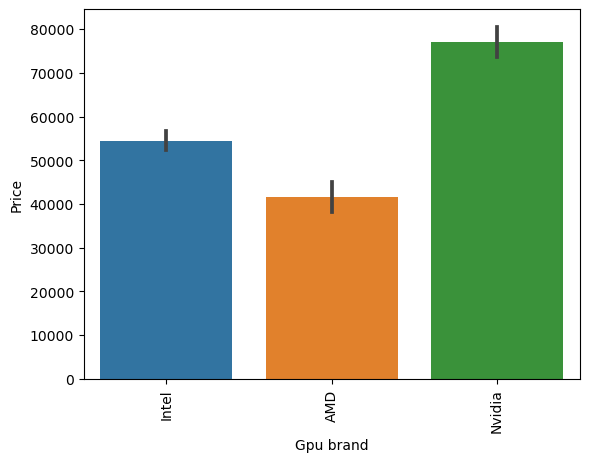

In [92]:
sns.barplot(x=df['Gpu brand'], y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show() 

In [93]:
df.drop(columns=['Gpu'], inplace= True)
df

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,SSD,HDD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,0,226.983001,Intel Core i5,128,0,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,256,0,Intel
3,Apple,Ultrabook,14,macOS,1.83,135195.3360,0,0,220.534629,Intel Core i7,512,0,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,0,226.983001,Intel Core i5,256,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,Windows 10,2.20,38378.6496,0,0,100.454667,Intel Core i7,0,500,Nvidia
1270,Lenovo,2 in 1 Convertible,4,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,128,0,Intel
1271,Lenovo,2 in 1 Convertible,14,Windows 10,1.30,79866.7200,1,1,276.053526,Intel Core i7,512,0,Intel
1272,Lenovo,Notebook,2,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel


In [94]:
df['OpSys'].value_counts() 

OpSys
Windows 10      1022
No OS             63
Linux             57
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

In [95]:
df = df[df['OpSys'] != 'Android']  

In [96]:
df['OpSys'].value_counts() 

OpSys
Windows 10      1022
No OS             63
Linux             57
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Name: count, dtype: int64

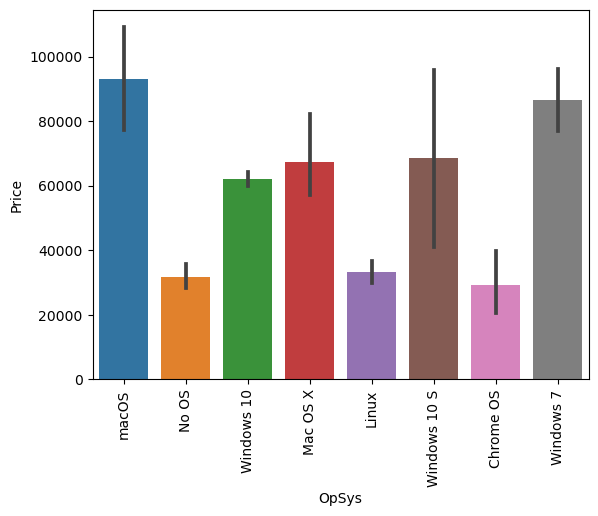

In [97]:
sns.barplot(x=df['OpSys'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show() 

In [98]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'  

In [99]:
df['os'] = df['OpSys'].apply(cat_os) 

In [100]:
df

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,SSD,HDD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,0,226.983001,Intel Core i5,128,0,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,256,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,14,macOS,1.83,135195.3360,0,0,220.534629,Intel Core i7,512,0,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,0,226.983001,Intel Core i5,256,0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,Windows 10,2.20,38378.6496,0,0,100.454667,Intel Core i7,0,500,Nvidia,Windows
1270,Lenovo,2 in 1 Convertible,4,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,128,0,Intel,Windows
1271,Lenovo,2 in 1 Convertible,14,Windows 10,1.30,79866.7200,1,1,276.053526,Intel Core i7,512,0,Intel,Windows
1272,Lenovo,Notebook,2,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows


In [101]:
df.drop(columns=['OpSys'], inplace= True) 

In [102]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,SSD,HDD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,0,226.983001,Intel Core i5,128,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677938,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211995,Intel Core i5,256,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,14,1.83,135195.3360,0,0,220.534629,Intel Core i7,512,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,0,226.983001,Intel Core i5,256,0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,2.20,38378.6496,0,0,100.454667,Intel Core i7,0,500,Nvidia,Windows
1270,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,128,0,Intel,Windows
1271,Lenovo,2 in 1 Convertible,14,1.30,79866.7200,1,1,276.053526,Intel Core i7,512,0,Intel,Windows
1272,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows


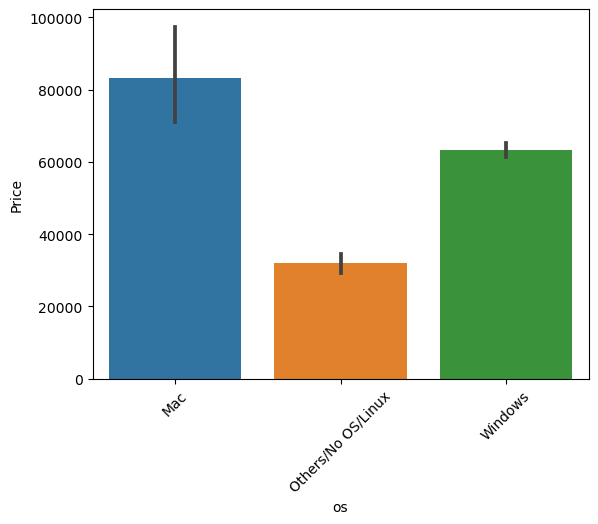

In [103]:
sns.barplot(x=df['os'], y=df['Price'])
plt.xticks(rotation = 45)
plt.show() 

<Axes: xlabel='Weight', ylabel='Price'>

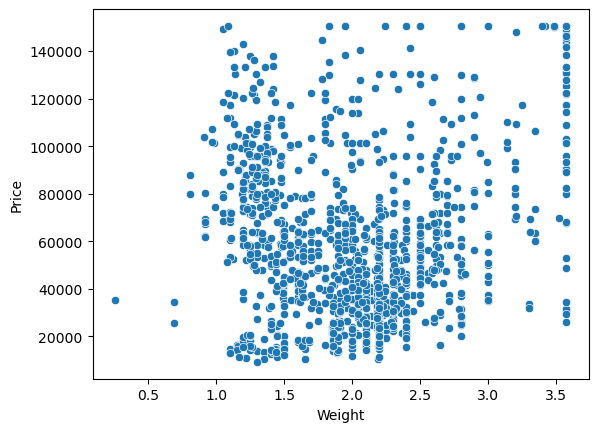

In [104]:
sns.scatterplot(x= df['Weight'], y=df['Price']) 

In [105]:
corr_col = df[['Ram','Weight','Price','Touchscreen','IPS','ppi','HDD','SSD']] 

In [106]:
corr_col.corrwith(df['Price'])  

Ram            0.735278
Weight         0.121785
Price          1.000000
Touchscreen    0.194698
IPS            0.194698
ppi            0.485040
HDD           -0.404342
SSD            0.667634
dtype: float64

In [107]:
corr_col.corr()

,Ram,Weight,Price,Touchscreen,IPS,ppi,HDD,SSD
Ram,1.000000,0.269415,0.735278,0.127567,0.127567,0.351677,-0.263328,0.589421
Weight,0.269415,1.000000,0.121785,-0.297935,-0.297935,-0.342625,0.196874,-0.081721
Price,0.735278,0.121785,1.000000,0.194698,0.194698,0.485040,-0.404342,0.667634
Touchscreen,0.127567,-0.297935,0.194698,1.000000,1.000000,0.436217,-0.113028,0.244131
IPS,0.127567,-0.297935,0.194698,1.000000,1.000000,0.436217,-0.113028,0.244131
ppi,0.351677,-0.342625,0.485040,0.436217,0.436217,1.000000,-0.341320,0.510663
HDD,-0.263328,0.196874,-0.404342,-0.113028,-0.113028,-0.341320,1.000000,-0.571647
SSD,0.589421,-0.081721,0.667634,0.244131,0.244131,0.510663,-0.571647,1.000000


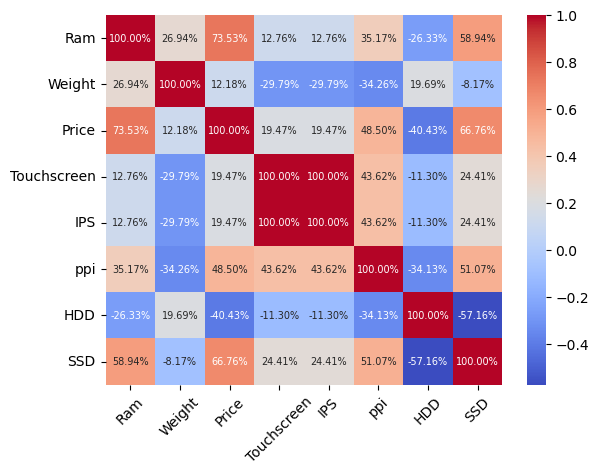

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate heatmap with correlation values
heatmap = sns.heatmap(corr_col.corr(), annot=True, fmt=".2%", cmap='coolwarm', annot_kws={"size": 7})

# Rotate the tick labels for better readability
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show() 

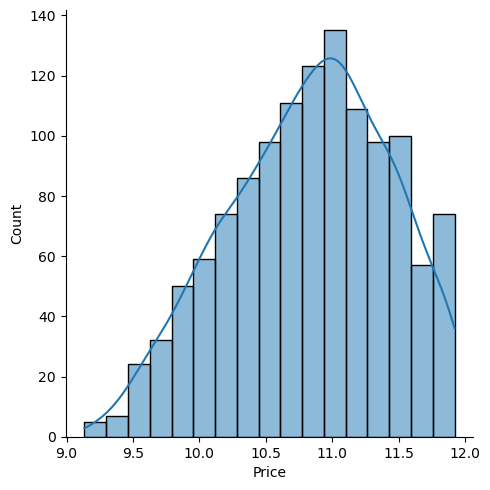

In [109]:
sns.displot(np.log(df['Price']), kde=True) 

In [110]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,SSD,HDD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,0,226.983001,Intel Core i5,128,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677938,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211995,Intel Core i5,256,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,14,1.83,135195.3360,0,0,220.534629,Intel Core i7,512,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,0,226.983001,Intel Core i5,256,0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,2.20,38378.6496,0,0,100.454667,Intel Core i7,0,500,Nvidia,Windows
1270,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,128,0,Intel,Windows
1271,Lenovo,2 in 1 Convertible,14,1.30,79866.7200,1,1,276.053526,Intel Core i7,512,0,Intel,Windows
1272,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows


In [111]:
df['Company'].value_counts() 

Company
Dell         281
Lenovo       281
HP           260
Asus         149
Acer         101
MSI           53
Toshiba       47
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
LG             3
Huawei         2
Fujitsu        2
Name: count, dtype: int64

In [112]:
x = df.drop(columns=['Price'])
y = np.log(df['Price']) 

In [113]:
x

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,SSD,HDD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,0,226.983001,Intel Core i5,128,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677938,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211995,Intel Core i5,256,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,14,1.83,0,0,220.534629,Intel Core i7,512,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,0,226.983001,Intel Core i5,256,0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,2.20,0,0,100.454667,Intel Core i7,0,500,Nvidia,Windows
1270,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,128,0,Intel,Windows
1271,Lenovo,2 in 1 Convertible,14,1.30,1,1,276.053526,Intel Core i7,512,0,Intel,Windows
1272,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows


In [114]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1269    10.555257
1270    10.433899
1271    11.288115
1272     9.409283
1273    10.614129
Name: Price, Length: 1242, dtype: float64

In [115]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.15,random_state=2) 

In [116]:
x_train 

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,SSD,HDD,Gpu brand,os
942,Acer,Notebook,4,2.23,0,0,100.454667,Intel Core i5,0,500,Intel,Windows
613,Dell,Notebook,4,2.25,0,0,100.454667,Intel Core i3,0,1000,Intel,Others/No OS/Linux
996,HP,Ultrabook,8,1.11,1,1,165.632116,Intel Core i7,256,0,Intel,Windows
1243,Dell,2 in 1 Convertible,14,2.77,1,1,127.335680,Intel Core i7,512,0,Nvidia,Windows
294,Lenovo,Notebook,8,2.05,0,0,141.211995,Intel Core i5,256,0,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
477,Lenovo,Notebook,8,1.70,0,0,157.350512,Intel Core i5,180,0,Intel,Windows
308,Lenovo,Notebook,8,2.30,0,0,141.211995,Intel Core i5,128,0,Nvidia,Windows
505,Lenovo,Notebook,8,1.44,0,0,165.632116,Intel Core i5,256,0,Intel,Windows
539,Lenovo,Notebook,8,1.87,0,0,157.350512,Intel Core i7,256,0,Nvidia,Windows


In [117]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error 

In [118]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR 
from xgboost import XGBRegressor 

# Linear Regression

In [119]:
step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse= False, drop= 'first'),[0,1,7,10,11])],
remainder = 'passthrough')

step2 = LinearRegression()

pipe = Pipeline([('step1', step1),
                 ('step2', step2)])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.788768327684397
MAE 0.2258082687110474


# Ridge Regression

In [120]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred)) 

R2 score 0.7801264882468404
MAE 0.2295833846216215


# Lasso Regression

In [121]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred)) 

R2 score 0.7816194575733678
MAE 0.2285614250189144


# KNN

In [122]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred)) 

R2 score 0.7083369284028385
MAE 0.23243925537454246


# Decision Tree

In [123]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2) 
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred)) 

R2 score 0.8295470077800242
MAE 0.19247816193703268


# SVM

In [124]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8133524619729589
MAE 0.21144171976842394


# Random Forest 

In [125]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred)) 

R2 score 0.8691139667237453
MAE 0.17547814237812015


# Extra Trees

In [126]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=None,
                              max_features=0.75,
                              max_depth=15,
                              bootstrap=False)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred)) 

R2 score 0.8656851121603631
MAE 0.1718432002641215


# AdaBoost

In [127]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred)) 

R2 score 0.7733084591730621
MAE 0.23892937473427558


# Gradient Boost 

In [128]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred)) 

R2 score 0.861158335813205
MAE 0.17459849890972173


# XgBoost 

In [129]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5) 

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred)) 

R2 score 0.8618431882740092
MAE 0.18270330520637743


# Voting Regressor 

In [130]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=None,max_features=0.75,max_depth=10,bootstrap=False)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred)) 

R2 score 0.8688812063256612
MAE 0.17514060463722278


# Stacking

In [131]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred)) 

R2 score: 0.855355782623924
MAE: 0.18723304812974975


## Hyperparameter Tuning to XGBoost

In [132]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Define transformers for columns
col_transformer = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

# Define pipeline with ColumnTransformer and XGBRegressor
pipe = Pipeline([
    ('step1', col_transformer),
    ('step2', XGBRegressor())
])

# Define parameter grid for hyperparameter tuning
param_grid = {
    'step2__n_estimators': [50, 100, 150, 200],
    'step2__learning_rate': [0.01, 0.05, 0.1, 0.5],
    'step2__max_depth': [3, 5, 7, 9],
    
}

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Print best parameters and best score
print("Best parameters found: ", grid_search.best_params_) 
print("Lowest MAE found: ", -grid_search.best_score_)

# Evaluate on test data
y_pred = grid_search.best_estimator_.predict(x_test)
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred)) 
best_r2_score = r2_score(y_test, y_pred)
print("Best R2 score found during hyperparameter tuning:", best_r2_score)  

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters found:  {'step2__learning_rate': 0.1, 'step2__max_depth': 5, 'step2__n_estimators': 200}
Lowest MAE found:  0.16302141547487495
R2 score: 0.8777343741430242
MAE: 0.16648186310489416
Best R2 score found during hyperparameter tuning: 0.8777343741430242


In [133]:
# Fit pipeline
grid_search.fit(x_train, y_train)

# Get best XGBRegressor model from pipeline
best_xgb_model = grid_search.best_estimator_.named_steps['step2']

# Extract feature importances
feature_importances = best_xgb_model.feature_importances_

# Get column names after transformation
column_names = grid_search.best_estimator_.named_steps['step1'].get_feature_names_out()

# Create a dictionary to store feature importances with corresponding column names
feature_importance_dict = dict(zip(column_names, feature_importances))

# Sort feature importances in descending order
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print top N features with highest importances
top_n = 10  # Adjust this value as needed
print(f"Top {top_n} features with highest importances:")
for feature, importance in sorted_feature_importances[:top_n]:
    print(f"{feature}: {importance}") 

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Top 10 features with highest importances:
remainder__Ram: 0.3271554708480835
col_tnf__Cpu brand_Other Intel Processor: 0.16728956997394562
col_tnf__TypeName_Notebook: 0.0969766229391098
col_tnf__Cpu brand_Intel Core i7: 0.056838102638721466
col_tnf__Cpu brand_Intel Core i5: 0.046629730612039566
remainder__HDD: 0.04451930522918701
col_tnf__os_Others/No OS/Linux: 0.04344292730093002
remainder__SSD: 0.030066562816500664
col_tnf__TypeName_Workstation: 0.02997232973575592
remainder__ppi: 0.023969877511262894
